# **Analiza jedrskih reaktorjev v komercialni uporabi in jedrskih nesreč po državah**

Pri projektni nalogi predmeta Uvod v programiranju sem se odločila analizirati podatke o jedrske reaktorje posameznih držav, kjer sem se osredotočila predvsem na reaktorje, ki proizvajajo elektriko. Zraven pa sem analizirala še podatke o jedrskih nesrečah, ki so jih reaktorji morebiti povzročili in izpostavila nekatere posledice. Podatke sem pridobila iz dveh spletnih strani, iz https://en.wikipedia.org/wiki/List_of_commercial_nuclear_reactors sem izluščila podatke o jedrskih reaktorjih, iz https://en.wikipedia.org/wiki/List_of_nuclear_power_accidents_by_country pa o jedrskih nesrečah.  

Za vsak reaktor posamezne države sem pridobila podatke o imenu elektrarne in državi, kjer se nahaja, številu reaktorjev, tipu, modelu, statusu (delujoč, planiran, zaprt,... ), moči, začeteku gradnje, začeteku delovanja in datumu zaprtja, če ni več v uporabi.
Za jedrske nesreče pa sem izlusčila podatke o datumu in lokaciji, opisu, številu smrti in denarni škodi, ki so ga povzročile. 

Na začetku sem posebej analizirala podatke o jedrskih reaktorjih in jedrskih nesrečah, iz katerih sem še podrobneje analizirala podatke za specifični državi, na koncu pa sem še ugotavljala kakšne so morebitne povezave med njimi.

### **Priprava**

Najprej si pripravimo okolje, da bomo lahko analizirali podatke in uvozimo potrebne knjižnice. Potem pa naložimo csv-ja z urejenimi podatki o jedrskih reaktorjih in nesrečah.

In [146]:
# paketi, ki jih potrebujemo za obdelavo podatkov
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [147]:
# naložimo razpredelnico, iz katere pridobivamo podatke o reaktorjih in nesrečah, ki so jih povzročili
reaktorji = pd.read_csv('../podatki/jedrski-reaktorji.csv')
jedr_nesrece = pd.read_csv('../podatki/jedrske-nesrece.csv')

## **Analiza podatkov o jedrskih reaktorjih**

Za začetek se osredotočimo na podatke o jedrskih reaktorjih in jih posebej analiziramo.

#### Celotna tabela:



In [148]:
# rapredelnica podatkov o jedrskih reaktorjih
reaktorji

,Ime elektrarne,Država,Številka reaktorja,Tip,Model,Status,Moč (MW),Začetek gradnje,Začetek delovanja,Datum zaprtja
0,Atucha,Argentina,1,PHWR,Siemens-KWU,Operational,335,1 Jun 1968,24 Jun 1974,NaN
1,Atucha,Argentina,2,PHWR,Siemens-KWU,Operational,692,14 Jul 1981,27 Jun 2014,NaN
2,Atucha,Argentina,3,PWR,Hualong One,Planned,1200,NaN,NaN,NaN
3,Embalse,Argentina,1,PHWR,CANDU-6,Operational,600,1 Apr 1974,20 Jan 1984,(2049)
4,CAREM,Argentina,1,PWR,CAREM25,Under construction,25,8 Feb 2014,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
907,Yankee Rowe,United States of America,1,PWR,WH (DRY),Dismantled,167,1 Nov 1957,1 Jul 1961,1 Oct 1991
908,Zion,United States of America,1,PWR,WH (DRY),Dismantled,1040,1 Dec 1968,31 Dec 1973,13 Feb 1998
909,Zion,United States of America,2,PWR,WH (DRY),Dismantled,1040,1 Dec 1968,17 Sep 1974,13 Feb 1998
910,Plant in the Jizzakh Region,Uzbekistan,1,PWR,VVER-1200,Planned,1200,NaN,NaN,NaN


Za bolšjo predstavo o številu reaktorjev po svetu lahko iz tabele razberemo število vseh jedrskih elektraren in reaktorjev:

In [149]:
#število jedrskih elektraren
display(reaktorji["Ime elektrarne"].nunique())

#število jedrskih reaktorjev
display(len(reaktorji))


360

912

Posebej pa lahko izpišemo še število delujočih, zaprtih, planiranih jedrskih reaktorjev in reaktorjev, ki jih še gradijo. Opazimo da je malo manj kot polovica raktorjev sploh delujočih, veliko pa jih je zaprtih ali zaradi drugačnih razlogov nedelujočih. Kljub temu pa se jih še kar nekaj gradi in planira. 

In [150]:
from IPython.display import display

#število delujočih reaktorjev
display(len(reaktorji.query('Status == "Operational"')))

#število reaktorjev, ki jih še planirajo zgraditi
display(len(reaktorji.query('Status == "Planned"')))

#število zaprtih reaktorjev
display(len(reaktorji.query('Status == "Shut down"')))

#število reaktorjev, ki jih še gradijo
display(len(reaktorji.query('Status == "Under construction"')))



415

122

103

66

Za boljšo vizualno predstavo podatke o številu reaktorejv glede na določen status prikažemo z grafom:

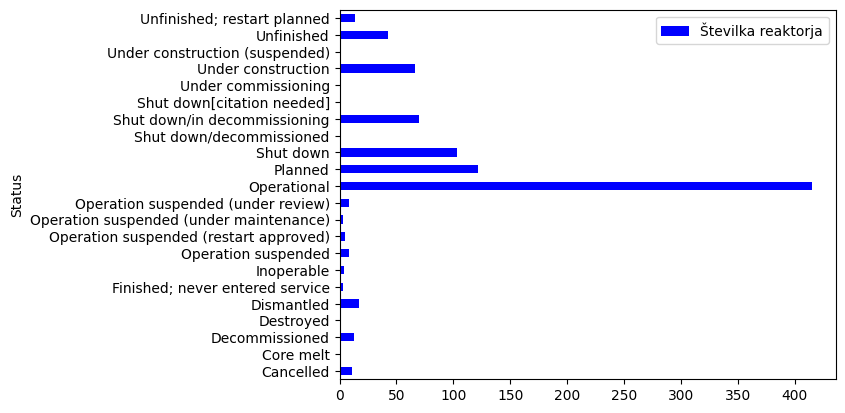

In [151]:
po_statusu = reaktorji.groupby("Status").count()

po_statusu.plot(kind="barh",
                    y="Številka reaktorja",
                    color="blue")

plt.show()


Analiziramo še različne tipe jedrskih reaktorjev. S tabelo najprej prikažemo število reaktorjev posameznega tipa in opazimo, da je najpogostejši tip reaktorja PWR ali pressurized water reactor (tlačnovodni reaktor).

In [152]:
# število reaktorjev posameznega tipa
presteto_tipi = reaktorji["Tip"].value_counts().to_frame()
presteto_tipi.rename(columns={'count':'Število reaktorjev'}, inplace=True)

presteto_tipi

,Število reaktorjev
Tip,
PWR,574
BWR,141
PHWR,76
GCR,51
LWGR,29
FBR,12
SFR,9
HTGR,8
HWGCR,4


In [153]:
po_tipu = reaktorji.groupby("Tip").size()

# najpogostejši tip reaktorja
po_tipu.idxmax()

'PWR'

Takšne pa imamo tudi pri nas v Sloveniji.

In [154]:
# jedrski reaktorji v Sloveniji
reaktorji[reaktorji["Država"] == "Slovenia"]

,Ime elektrarne,Država,Številka reaktorja,Tip,Model,Status,Moč (MW),Začetek gradnje,Začetek delovanja,Datum zaprtja
578,Krško,Slovenia,1,PWR,WH 2 loops,Operational,688,30 Mar 1975,1 Jan 1983,(2043)
579,Krško,Slovenia,2,PWR,TBD,Planned,1100,NaN,(2030),NaN


Za boljšo preglednost naredimo tabelo, ki prikazuje posamezne elektrarne z reaktorji in njihovimi močmi v MW. Tako si lahko podrobneje ogledamo reaktorje z večjimi močmi.

In [155]:
# ime elektrarne, njeni reaktorji in njihova moč
reaktorji[["Ime elektrarne", "Številka reaktorja", "Moč (MW)"]]

,Ime elektrarne,Številka reaktorja,Moč (MW)
0,Atucha,1,335
1,Atucha,2,692
2,Atucha,3,1200
3,Embalse,1,600
4,CAREM,1,25
...,...,...,...
907,Yankee Rowe,1,167
908,Zion,1,1040
909,Zion,2,1040
910,Plant in the Jizzakh Region,1,1200


Prikaz vseh reaktorjev z močjo večjo od 1000 MW in njihovo število:

In [156]:
delujoci = reaktorji[reaktorji["Status"] == "Operational"]
moci_delujoci = delujoci[delujoci["Moč (MW)"].astype(float) >= 1000]

# prikaz delujočih jedrskih reaktorjev z močjo večjo od 1000 MW
display(moci_delujoci)

display(len(moci_delujoci))

,Ime elektrarne,Država,Številka reaktorja,Tip,Model,Status,Moč (MW),Začetek gradnje,Začetek delovanja,Datum zaprtja
10,Ostrovets,Belarus,1,PWR,VVER-1200/V-491,Operational,1109,6 Nov 2013,10 Jun 2021,NaN
11,Ostrovets,Belarus,2,PWR,VVER-1200/V-491,Operational,1109,24 Apr 2014,1 Nov 2023,NaN
18,Doel,Belgium,4,PWR,Belgian firms plus WH 3 loops,Operational,1039,1 Dec 1978,1 Jul 1985,(2035)
21,Tihange,Belgium,3,PWR,Belgian firms plus WH 3 loops,Operational,1046,1 Nov 1978,1 Sep 1985,(2035)
23,Angra,Brazil,2,PWR,Pre-Konvoi,Operational,1275,1 Jan 1976,1 Feb 2001,NaN
...,...,...,...,...,...,...,...,...,...,...
902,Vogtle,United States of America,4,PWR,AP1000,Operational,1117,19 Nov 2013,29 April 2024,NaN
903,Waterford,United States of America,1,PWR,CE 2-loop (DRY),Operational,1168,14 Nov 1974,24 Sep 1985,NaN
904,Watts Bar,United States of America,1,PWR,WH 4-Loop (ICECOND),Operational,1157,20 Jul 1973,27 May 1996,NaN
905,Watts Bar,United States of America,2,PWR,WH 4-Loop (ICECOND),Operational,1164,1 Sep 1973,4 Jun 2016,NaN


159

Izmed reaktorjev z močjo nad 1000 MW lahko najdemo 10 tistih, ki imajo največje moči. Vidimo da jih največ najdemo v Franciji, na Finskem in na Kitajskem pa so najmočnejši na svetu, kar ni tako presenetljivo, saj je Kitajska ena najbolj tehnološko razvitih držav.

In [157]:
#10 jedrskih reaktorjev z največjo močjo
moci_delujoci = moci_delujoci.astype({"Moč (MW)": float})

moci_delujoci.nlargest(10, "Moč (MW)")

,Ime elektrarne,Država,Številka reaktorja,Tip,Model,Status,Moč (MW),Začetek gradnje,Začetek delovanja,Datum zaprtja
142,Taishan,China,1,PWR,EPR,Operational,1660.0,18 Nov 2009,14 Dec 2018,NaN
143,Taishan,China,2,PWR,EPR,Operational,1660.0,15 Apr 2010,7 Sep 2019,NaN
201,Olkiluoto,Finland,3,PWR,EPR,Operational,1600.0,12 Aug 2005,16 Apr 2023,NaN
228,Chooz,France,B-1,PWR,N4 REP 1450,Operational,1500.0,1 Jan 1984,15 May 2000,NaN
229,Chooz,France,B-2,PWR,N4 REP 1450,Operational,1500.0,1 Jan 1984,15 May 2000,NaN
230,Civaux,France,1,PWR,N4 REP 1450,Operational,1495.0,15 Oct 1988,29 Jan 2002,NaN
231,Civaux,France,2,PWR,N4 REP 1450,Operational,1495.0,1 Apr 1991,23 Apr 2002,NaN
636,Oskarshamn,Sweden,3,BWR,"ASEA-IV, BWR-3000",Operational,1450.0,1 May 1980,15 Aug 1985,NaN
605,Saeul,South Korea,2,PWR,APR-1400,Operational,1418.0,19 Aug 2009,29 Aug 2019,NaN
604,Saeul,South Korea,1,PWR,APR-1400,Operational,1416.0,16 Oct 2008,15 Jan 2016,NaN


In [158]:
najmocnejsi = moci_delujoci["Moč (MW)"].astype(float).idxmax()

# jedrski reaktor z največjo močjo
moci_delujoci.loc[najmocnejsi]

Ime elektrarne            Taishan
Država                      China
Številka reaktorja              1
Tip                           PWR
Model                         EPR
Status                Operational
Moč (MW)                   1660.0
Začetek gradnje       18 Nov 2009
Začetek delovanja     14 Dec 2018
Datum zaprtja                 NaN
Name: 142, dtype: object

#### **Jedrski reaktorji po državah**

Tabelo reaktorjev uredimo po državah in prikažemo število reaktorjev za posamezno državo.

In [159]:
# prikaz reaktorjev razporejenih po državah
reaktorji.groupby("Država").count()

,Ime elektrarne,Številka reaktorja,Tip,Model,Status,Moč (MW),Začetek gradnje,Začetek delovanja,Datum zaprtja
Država,,,,,,,,,
Argentina,5,5,5,5,5,5,4,3,1
Armenia,2,2,2,2,2,2,2,2,2
Austria,1,1,1,1,1,1,1,0,1
Bangladesh,2,2,2,2,2,2,2,2,0
Belarus,4,4,4,4,4,4,4,2,2
Belgium,8,8,8,8,8,8,8,8,8
Brazil,3,3,3,3,3,3,3,3,0
Bulgaria,10,10,10,10,10,10,8,7,4
Canada,29,29,29,29,29,29,29,29,25


In [160]:
po_drzavah = reaktorji.groupby("Država").size()

# država z največ jedrskimi elektrarnami
po_drzavah.idxmax()

'United States of America'

Kot pričakovano I tabele lahko razberemo, da imajo večje število jedrskih reaktorjev države, ki so bolj tehnološko napredne. Tako vidimo da v ZDA najdemo največ jederskih reaktorjev, takoj za njo pa je Kitajska. Sta edini državi, ki imata več kot 100 jedrskih reaktorjev, velika večina držav pa ima manj kot 50 reaktorjev. Samo en jedrski reaktor pa najdemo v Avstriji, na Filipinih in v Kazahstanu. 

Za boljšo predstavo z grafom prikažemo 20 držav z največjim številom reaktorjev: 

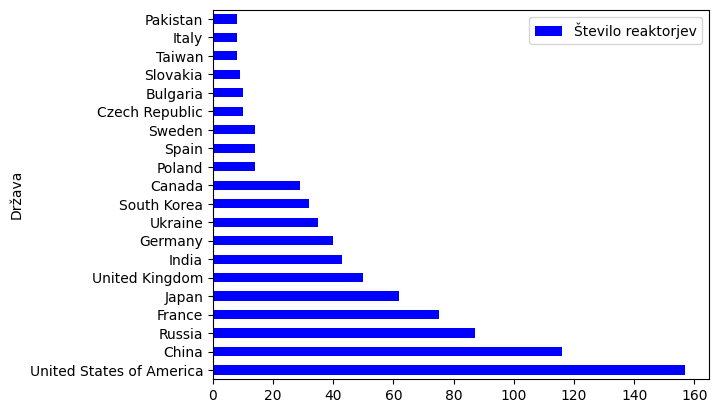

In [161]:
presteto_reaktorji = reaktorji["Država"].value_counts().to_frame()
presteto_reaktorji.rename(columns={"count":"Število reaktorjev"}, inplace=True)
najvec_reaktorjev = presteto_reaktorji.nlargest(20, "Število reaktorjev")

najvec_reaktorjev.plot(kind="barh",
                    y="Število reaktorjev",
                    color="blue")

plt.show()


##### Jedrski reaktorji v ZDA

Podrobneje analiziramo še jedrske elektrarne v ZDA, kot državo z največjim številom jedrskih reaktorjev ter primerjamo s podatki o jedrskih reaktorjih na Kitajskem, državo z drugim največjim številom rekatorjev. 

Prikaz tabele reaktorjev v ZDA in na Kitajskem:

In [162]:
indeksi = reaktorji.index[reaktorji["Država"] == "United States of America"].tolist()
reaktorji_v_zda = reaktorji.loc[indeksi]

# jedrske elektrarne v ZDA
display(reaktorji_v_zda)

indeksi_c = reaktorji.index[reaktorji["Država"] == "China"].tolist()
reaktorji_na_kitajskem = reaktorji.loc[indeksi_c]

# jedrske elektrarne na Kitajskem
display(reaktorji_na_kitajskem)

,Ime elektrarne,Država,Številka reaktorja,Tip,Model,Status,Moč (MW),Začetek gradnje,Začetek delovanja,Datum zaprtja
753,Arkansas Nuclear One,United States of America,1,PWR,B & W (DRY-Cont),Operational,836,1 Oct 1968,21 May 1974,NaN
754,Arkansas Nuclear One,United States of America,2,PWR,CE (DRY),Operational,988,6 Dec 1968,1 Sep 1978,NaN
755,Beaver Valley,United States of America,1,PWR,WH 3-loop (DRY),Operational,908,26 Jun 1970,2 Jul 1976,NaN
756,Beaver Valley,United States of America,2,PWR,WH 3-loop (DRY),Operational,905,3 May 1974,14 Aug 1987,NaN
757,Big Rock Point,United States of America,1,BWR,BWR-1,Dismantled,67,1 May 1960,29 Mar 1963,29 Aug 1997
...,...,...,...,...,...,...,...,...,...,...
905,Watts Bar,United States of America,2,PWR,WH 4-Loop (ICECOND),Operational,1164,1 Sep 1973,4 Jun 2016,NaN
906,Wolf Creek,United States of America,1,PWR,WH 4-Loop (DRY),Operational,1200,31 May 1977,3 Sep 1985,NaN
907,Yankee Rowe,United States of America,1,PWR,WH (DRY),Dismantled,167,1 Nov 1957,1 Jul 1961,1 Oct 1991
908,Zion,United States of America,1,PWR,WH (DRY),Dismantled,1040,1 Dec 1968,31 Dec 1973,13 Feb 1998


,Ime elektrarne,Država,Številka reaktorja,Tip,Model,Status,Moč (MW),Začetek gradnje,Začetek delovanja,Datum zaprtja
64,Bailong,China,1,PWR,CAP-1000,Planned,1100,NaN,NaN,NaN
65,Bailong,China,2,PWR,CAP-1000,Planned,1100,NaN,NaN,NaN
66,Changjiang,China,I-1,PWR,CNP-600,Operational,601,25 Apr 2010,25 Dec 2015,NaN
67,Changjiang,China,I-2,PWR,CNP-600,Operational,601,21 Nov 2010,20 Jun 2016,NaN
68,Changjiang,China,I-3,PWR,Hualong One,Under construction,1200,31 Mar 2021,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
175,Yangjiang,China,6,PWR,ACPR-1000,Operational,1000,23 Dec 2013,24 Jul 2019,NaN
176,Zhangzhou,China,1,PWR,Hualong One,Under construction,1126,16 Oct 2019,NaN,NaN
177,Zhangzhou,China,2,PWR,Hualong One,Under construction,1126,4 Sep 2020,NaN,NaN
178,Zhangzhou,China,3,PWR,Hualong One,Under construction,1126,22 Feb 2024,NaN,NaN


Iz tabele lahko razberemo število reaktorjev v državi in od tega, koliko jih je delujočih, planiranih, nedokončanih in zaprtih.

In [163]:
# število jedrskih reaktorjev v ZDA
display(len(reaktorji_v_zda))

# število jedrskih reaktorjev na Kitajskem
display(len(reaktorji_na_kitajskem))

157

116

Lahko vidimo, da je velika večina delujočih, približno 10% pa jih je zaprtih.

In [164]:
# število delujočih reaktorjev
display(len(reaktorji_v_zda.query('Status == "Operational"')))

# število reaktorjev, ki jih še planirajo zgraditi
display(len(reaktorji_v_zda.query('Status == "Planned"')))

# število nedokončahnih reaktorjev
display(len(reaktorji_v_zda.query('Status == "Unfinished"'))) 

# število zaprtih reaktorjev
display(len(reaktorji_v_zda.query('Status == "Shut down"')))

94

9

7

18

Opazimo, da je število delujočih jedrskih reaktorjev na Kitajskem občutno manjše kot v ZDA. Približno polovica vseh reaktorjev na Kitajskem je delujočih, medtem kk je v ZDA aktivnih večji del. Vidimo pa, da je število planiranih jedrskih reaktorjev, ki jih bodo še zgradili, konkretno večje kot za ZDA.

In [165]:
#število delujočih reaktorjev na Kitajskem
display(len(reaktorji_na_kitajskem.query('Status == "Operational"')))

# število reaktorjev, ki jih še planirajo zgraditi
display(len(reaktorji_na_kitajskem.query('Status == "Planned"')))


56

35

Ogledamo si še reaktorje z močjo večjo od 1000 MW: 

In [166]:
pd.set_option('display.max_rows', 50)

delujoci_zda = reaktorji_v_zda[reaktorji_v_zda["Status"] == "Operational"]
moc_delujoci_zda = delujoci_zda[delujoci_zda["Moč (MW)"].astype(int) >= 1000]

# tabela delujočih jedrskih reaktorjev v ZDA z močjo večjo od 1000 MW
moc_delujoci_zda

,Ime elektrarne,Država,Številka reaktorja,Tip,Model,Status,Moč (MW),Začetek gradnje,Začetek delovanja,Datum zaprtja
758,Braidwood,United States of America,1,PWR,WH 4-loop (DRY),Operational,1194,1 Aug 1975,29 Jul 1988,NaN
759,Braidwood,United States of America,2,PWR,WH 4-loop (DRY),Operational,1160,1 Aug 1975,17 Oct 1988,NaN
760,Browns Ferry,United States of America,1,BWR,BWR-4 (WET),Operational,1200,1 May 1967,1 Aug 1974,NaN
761,Browns Ferry,United States of America,2,BWR,BWR-4 (WET),Operational,1200,1 May 1967,1 Mar 1975,NaN
762,Browns Ferry,United States of America,3,BWR,BWR-4 (WET),Operational,1210,1 Jul 1968,1 Mar 1977,NaN
...,...,...,...,...,...,...,...,...,...,...
902,Vogtle,United States of America,4,PWR,AP1000,Operational,1117,19 Nov 2013,29 April 2024,NaN
903,Waterford,United States of America,1,PWR,CE 2-loop (DRY),Operational,1168,14 Nov 1974,24 Sep 1985,NaN
904,Watts Bar,United States of America,1,PWR,WH 4-Loop (ICECOND),Operational,1157,20 Jul 1973,27 May 1996,NaN
905,Watts Bar,United States of America,2,PWR,WH 4-Loop (ICECOND),Operational,1164,1 Sep 1973,4 Jun 2016,NaN


In [167]:
delujoci_kitajska = reaktorji_na_kitajskem[reaktorji_na_kitajskem["Status"] == "Operational"]
moc_delujoci_kitajska = delujoci_kitajska[delujoci_kitajska["Moč (MW)"].astype(int) >= 1000]

# tabela delujočih jedrskih reaktorjev v ZDA z močjo večjo od 1000 MW
moc_delujoci_kitajska

,Ime elektrarne,Država,Številka reaktorja,Tip,Model,Status,Moč (MW),Začetek gradnje,Začetek delovanja,Datum zaprtja
74,Fangchenggang,China,1,PWR,CPR-1000,Operational,1000,30 Jul 2010,25 Oct 2015,NaN
75,Fangchenggang,China,2,PWR,CPR-1000,Operational,1000,23 Dec 2010,15 Jul 2016,NaN
76,Fangchenggang,China,3,PWR,Hualong One,Operational,1000,24 Dec 2015,25 Mar 2023,NaN
77,Fangchenggang,China,4,PWR,Hualong One,Operational,1000,24 Dec 2016,25 May 2024,NaN
80,Fangjiashan,China,1,PWR,CPR-1000,Operational,1012,26 Dec 2008,15 Dec 2014,NaN
81,Fangjiashan,China,2,PWR,CPR-1000,Operational,1012,17 Jul 2009,12 Feb 2015,NaN
82,Fuqing,China,1,PWR,CPR-1000,Operational,1000,21 Nov 2008,19 Nov 2014,NaN
83,Fuqing,China,2,PWR,CPR-1000,Operational,1000,17 Jun 2009,15 Oct 2015,NaN
84,Fuqing,China,3,PWR,CPR-1000,Operational,1000,31 Dec 2010,7 Sep 2016,NaN
85,Fuqing,China,4,PWR,CPR-1000,Operational,1000,17 Nov 2012,31 Jul 2017,NaN


Iz tabele lahko razberemo, da ima približno polovica vseh delujočih reaktorjev v ZDA večjo moč od 1000 MW, medtem ko je skoraj vsi delujoči reaktorji na Kitajskem takšno moč. Torej ima ZDA več močnejših reaktorjev kot Kitajska, vendar je delež močnejših jedrskih reaktorjev glede na celotno število reaktorjev v državi večji na Kitajskem.

In [168]:
# število delujočih jedrskih reaktorjev v ZDA z močjo večjo od 1000 MW
display(len(moc_delujoci_zda))

# število delujočih jedrskih reaktorjev v ZDA z močjo večjo od 1000 MW
display(len(moc_delujoci_kitajska))

52

40

Primerjamo še najmočnejše jedrske reaktorje v ZDA in na kitajskem.

Prikaz 10 najmočnejših reaktorjev v ZDA in na Kitajskem:

In [169]:
moc_delujoci_zda = moc_delujoci_zda.astype({"Moč (MW)" : int})

moc_delujoci_zda.nlargest(10, "Moč (MW)")

,Ime elektrarne,Država,Številka reaktorja,Tip,Model,Status,Moč (MW),Začetek gradnje,Začetek delovanja,Datum zaprtja
804,Grand Gulf,United States of America,1,BWR,BWR-6 (WET),Operational,1401,4 May 1974,1 Jul 1985,NaN
850,Peach Bottom,United States of America,3,BWR,BWR-4 (WET),Operational,1331,31 Jan 1968,23 Dec 1974,NaN
844,Palo Verde,United States of America,2,PWR,CE80 2-loop (DRY),Operational,1314,1 Jun 1976,19 Sep 1986,NaN
845,Palo Verde,United States of America,3,PWR,CE80 2-loop (DRY),Operational,1312,1 Jun 1976,8 Jan 1988,NaN
843,Palo Verde,United States of America,1,PWR,CE80 2-loop (DRY),Operational,1311,25 May 1976,28 Jan 1986,NaN
849,Peach Bottom,United States of America,2,BWR,BWR-4 (WET),Operational,1300,31 Jan 1968,5 Jul 1974,NaN
879,South Texas,United States of America,1,PWR,WH 4-loop (DRY),Operational,1280,22 Dec 1975,25 Aug 1988,NaN
880,South Texas,United States of America,2,PWR,WH 4-loop (DRY),Operational,1280,22 Dec 1975,19 Jun 1989,NaN
835,Nine Mile Point,United States of America,2,BWR,BWR-5 (WET),Operational,1277,1 Aug 1975,11 Mar 1988,NaN
885,Susquehanna,United States of America,1,BWR,BWR-5 (WET),Operational,1257,2 Nov 1973,12 Nov 1982,NaN


In [170]:
moc_delujoci_kitajska = moc_delujoci_kitajska.astype({"Moč (MW)" : int})

moc_delujoci_kitajska.nlargest(10, "Moč (MW)")

,Ime elektrarne,Država,Številka reaktorja,Tip,Model,Status,Moč (MW),Začetek gradnje,Začetek delovanja,Datum zaprtja
142,Taishan,China,1,PWR,EPR,Operational,1660,18 Nov 2009,14 Dec 2018,NaN
143,Taishan,China,2,PWR,EPR,Operational,1660,15 Apr 2010,7 Sep 2019,NaN
88,Haiyang,China,1,PWR,AP1000,Operational,1170,24 Sep 2009,23 Oct 2018,NaN
89,Haiyang,China,2,PWR,AP1000,Operational,1170,20 Jun 2010,9 Jan 2019,NaN
131,Sanmen,China,1,PWR,AP1000,Operational,1157,19 Apr 2009,21 Sep 2018,NaN
132,Sanmen,China,2,PWR,AP1000,Operational,1157,15 Dec 2009,5 Nov 2018,NaN
94,Hongyanhe,China,1,PWR,CPR-1000,Operational,1061,18 Aug 2007,6 Jun 2013,NaN
95,Hongyanhe,China,2,PWR,CPR-1000,Operational,1061,28 Mar 2008,13 May 2014,NaN
96,Hongyanhe,China,3,PWR,CPR-1000,Operational,1061,7 Mar 2009,23 Mar 2015,NaN
97,Hongyanhe,China,4,PWR,CPR-1000,Operational,1061,15 Aug 2009,1 Apr 2016,NaN


Opazimo, da je 10 najmočnejših reaktorjev, katerih moč ne presega 1200 MW, z izjemo dveh, večinoma šibkejši od reaktorjev v ZDA, ki nimajo manjše moči od 1200 MW. 
Izmed teh je ima najmočnejši jedrski reaktor v ZDA moč 1401 MW, kar je ševedno manj od najmočnejših na svetu, ki jih najdemo na Kitajskem z močjo tudi večjo od 1600 MW.

In [171]:
najmocnejsi = moc_delujoci_zda["Moč (MW)"].astype(float).idxmax()

# jedrski reaktor v ZDA z največjo močjo
moc_delujoci_zda.loc[najmocnejsi]

Ime elektrarne                      Grand Gulf
Država                United States of America
Številka reaktorja                           1
Tip                                        BWR
Model                              BWR-6 (WET)
Status                             Operational
Moč (MW)                                  1401
Začetek gradnje                     4 May 1974
Začetek delovanja                   1 Jul 1985
Datum zaprtja                              NaN
Name: 804, dtype: object

## **Analiza podatkov o jedrskih nesrečah**

#### **Celotna tabela**

Sedaj analiziramo še podatke o jedrskih nesrečah po različnih državah.

Prikaz tabele o jedrskih nesrečah:

In [172]:
pd.set_option('display.max_rows', 100)

# prikaz podatkov o jedrskih nesrečah
jedr_nesrece

,Datum,Lokacija,Država,Opis,Smrti,Škoda (mio $),INES ocena
0,2002,"Tihange, Belgium",Belgium,"""Safety injection during hot shutdown at Tihan...",0.0,NaN,2.0
1,2005,"Tihange, Belgium",Belgium,"""Inadequate protection relays and related setp...",0.0,NaN,2.0
2,2006,"Fleurus, Belgium",Belgium,"""Severe health effects for a worker at a comme...",0.0,NaN,4.0
3,2008,"Fleurus, Belgium",Belgium,Iodine-131 release in the environment.,0.0,NaN,3.0
4,2011,"Doel, Belgium",Belgium,"""Inadequate setting of the auxiliary feedwater...",0.0,NaN,2.0
...,...,...,...,...,...,...,...
128,August 2011,"Louisa county, Virginia, USA",United States of America,A 5.8-earthquake in the region caused the loss...,0.0,NaN,2.0
129,"March 13, 2013","Russellville, Arkansas, USA",United States of America,Temporary overhead crane collapsed at Arkansas...,1.0,NaN,NaN
130,January 2014,"St. Lucie, Florida, USA",United States of America,Flooding of the auxiliary building of the St. ...,0.0,NaN,NaN
131,July 2016,"Michigan, USA",United States of America,Massive steam leak in the turbine building of ...,0.0,NaN,NaN


Vidimo, da sej je pripetilo več kot 100 jedrskih nesreč na svetu, kar nažalost ni zelo malo. 

In [173]:
# število jedrskih nesrec
len(jedr_nesrece)

133

Za boljšo preglednost izpostavimo podatke o številu smrti, količini škode in INES oceni za jedrsko nesrečo v posamezni državi. Te podatke prikažemo z grafoma denarne škode in številom smrti v odvisnosti od INES ocene. Jasnoprikažeta, da je povzročena večja denarna in večje število smrti pri hujših jedrskih nesrečah, torej tistih z večjo INES oceno.

In [174]:
jedr_nesrece[["Država", "Smrti", "Škoda (mio $)", "INES ocena"]]

,Država,Smrti,Škoda (mio $),INES ocena
0,Belgium,0.0,NaN,2.0
1,Belgium,0.0,NaN,2.0
2,Belgium,0.0,NaN,4.0
3,Belgium,0.0,NaN,3.0
4,Belgium,0.0,NaN,2.0
...,...,...,...,...
128,United States of America,0.0,NaN,2.0
129,United States of America,1.0,NaN,NaN
130,United States of America,0.0,NaN,NaN
131,United States of America,0.0,NaN,NaN


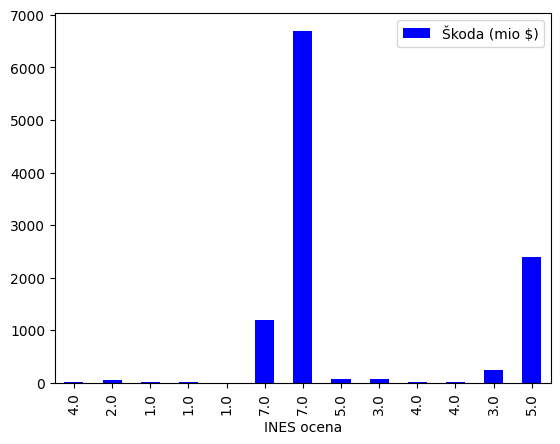

In [175]:
jedr_nesrece.dropna().plot(kind="bar",
                    x="INES ocena",
                    y="Škoda (mio $)",
                    color="blue")

plt.show()

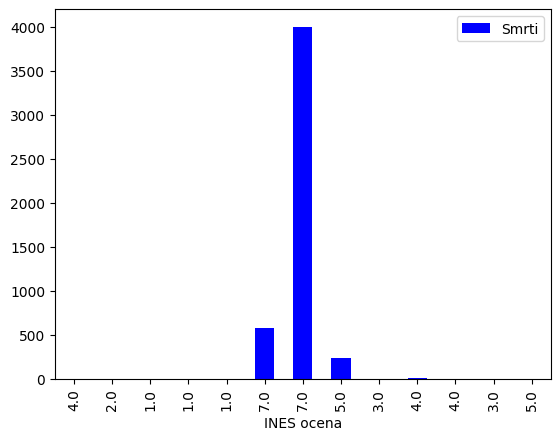

In [176]:
jedr_nesrece.dropna().plot(kind="bar",
                    x="INES ocena",
                    y="Smrti",
                    color="blue")

plt.show()


Posebej prikažemo še jedrske nesreče z oceno 4 ali več na INES lestvici. Vidimo da jih je največ v ZDA, najmočnejši pa sta bili na Japonskem in v Ukrajini. 

In [177]:
jedr_nesrece["INES ocena"] = jedr_nesrece["INES ocena"].dropna(how='all')
po_lestvici = jedr_nesrece[jedr_nesrece["INES ocena"].astype(float) >= 4]

# prikaz jedrskih nesreč z INES oceno 4 ali več
po_lestvici

,Datum,Lokacija,Država,Opis,Smrti,Škoda (mio $),INES ocena
2,2006,"Fleurus, Belgium",Belgium,"""Severe health effects for a worker at a comme...",0.0,NaN,4.0
5,"December 12, 1952","CRL, Ontario, Canada",Canada,The NRX accident. A hydrogen explosion occurre...,0.0,NaN,5.0
15,17 Oct 1969,"Loir-et-Cher, France",France,50 kg of uranium dioxide melted inside of the ...,0.0,NaN,4.0
17,13 Mar 1980,"Loir-et-Cher, France",France,A malfunctioning cooling system fused fuel ele...,0.0,22.0,4.0
48,30 Sept 1999,"Tokaimura, Japan",Japan,The criticality accident at the Tokai fuel fab...,2.0,NaN,4.0
54,Mar 2011,"Fukushima Dai-ichi, Japan",Japan,The world's second INES 7 accident. A magnitud...,573.0,1200.0,7.0
57,1957,"Mayak reprocessing plant, Ural-region",Russia,Kyshtym disaster: Explosion in a waste tank of...,200.0,NaN,6.0
58,1975,"Leningrad, Soviet union",Russia,Reactor 1 of the Leningrad Nuclear Power Plant...,0.0,NaN,4.0
66,January 1969,"Lucens, Switzerland",Switzerland,Melting of a fuel element of the protoptype po...,0.0,NaN,4.0
69,26 Apr 1986,"Pripyat, Ukraine, USSR",Ukraine,Steam explosion and meltdown (see Chernobyl di...,4000.0,6700.0,7.0


Ogledamo si še jedrske nesreče, ki so povzročile največ denarne škode. Največ se jih je pripetilo V ZDA, največjo škodo pa je povzročila jedrska nesreča v Ukrajini. 

In [178]:
jedr_nesrece["Škoda (mio $)"] = jedr_nesrece["Škoda (mio $)"].dropna(how='all')
po_skodi = jedr_nesrece[jedr_nesrece["Škoda (mio $)"].astype(float) >= 400]

# prikaz jedrskih nesreč, ki so povzročile največ stroškov 
po_skodi

,Datum,Lokacija,Država,Opis,Smrti,Škoda (mio $),INES ocena
54,Mar 2011,"Fukushima Dai-ichi, Japan",Japan,The world's second INES 7 accident. A magnitud...,573.0,1200.0,7.0
69,26 Apr 1986,"Pripyat, Ukraine, USSR",Ukraine,Steam explosion and meltdown (see Chernobyl di...,4000.0,6700.0,7.0
88,"March 28, 1979","Middletown, Pennsylvania, USA",United States of America,"Loss of coolant and partial core meltdown, see...",0.0,2400.0,5.0
97,"March 9, 1985","Athens, Alabama, USA",United States of America,Instrumentation systems malfunction during sta...,0.0,1830.0,NaN
98,"April 11, 1986","Plymouth, Massachusetts, USA",United States of America,Recurring equipment problems force emergency s...,0.0,1001.0,NaN
100,"March 31, 1987","Delta, Pennsylvania, USA",United States of America,Peach Bottom units 2 and 3 shutdown due to coo...,0.0,400.0,NaN
127,"February 1, 2010","Vernon, Vermont, USA",United States of America,Deteriorating underground pipes from the Vermo...,0.0,700.0,NaN


Iz tabele izluščimo še podatke o jedrskih nesrečah s številom smrti večjim od 200. Takih ni veliko vendar je nesreča v Ukrajini povzročila kar 4000 žrtev.

In [179]:
jedr_nesrece["Smrti"] = jedr_nesrece["Smrti"].dropna(how='all')
po_smrti = jedr_nesrece[jedr_nesrece["Smrti"].astype(float) >= 200]

#prkaz jedrskih nesreč, ki so povzročile največ smrti
po_smrti

,Datum,Lokacija,Država,Opis,Smrti,Škoda (mio $),INES ocena
54,Mar 2011,"Fukushima Dai-ichi, Japan",Japan,The world's second INES 7 accident. A magnitud...,573.0,1200.0,7.0
57,1957,"Mayak reprocessing plant, Ural-region",Russia,Kyshtym disaster: Explosion in a waste tank of...,200.0,NaN,6.0
69,26 Apr 1986,"Pripyat, Ukraine, USSR",Ukraine,Steam explosion and meltdown (see Chernobyl di...,4000.0,6700.0,7.0
72,8 Oct 1957,"Sellafield, UK",United Kingdom,Fire ignited plutonium piles of a military rea...,240.0,78.0,5.0


Opazimo, da se nekatere jedrske nesreče pojavijo v useh tabelah, kar spet nakazuje na povezanost teh podatkov, najhujša jedrska nesreča, ki pa je povzročila največ smrtnih žrtev, največjo denarno škodo in ima najvišjo oceno na INES lestvici, pa je seveda znana jedrska nesreča, ki jo je povzročila jedrska elektrarna Chernobyl v Ukrajini.

In [180]:
najhujsa = jedr_nesrece["Smrti"].astype(float).idxmax()

#jedrska nesreča, ki je povzročila največ stroškov in smrti ter ima najvišjo oceno po INES lestvici
jedr_nesrece.loc[najhujsa]

Datum                                                  26 Apr 1986
Lokacija                                    Pripyat, Ukraine, USSR
Država                                                     Ukraine
Opis             Steam explosion and meltdown (see Chernobyl di...
Smrti                                                       4000.0
Škoda (mio $)                                               6700.0
INES ocena                                                     7.0
Name: 69, dtype: object

#### **Jedrske nesreče po državah**

Osredotočimo se še na jedrske nesreče, urejene po državah.

In [181]:
# prikaz jedrskih nesreč razporejenih po državah
jedr_nesrece.groupby("Država").count()

,Datum,Lokacija,Opis,Smrti,Škoda (mio $),INES ocena
Država,,,,,,
Belgium,5,5,5,5,0,5
Canada,10,10,10,10,0,3
France,12,12,12,12,9,8
Germany,3,3,3,3,2,1
India,6,6,6,6,6,0
Japan,20,20,20,20,1,5
Pakistan,1,1,1,1,0,0
Russia,7,7,7,5,0,3
Serbia,1,1,1,1,0,1


Vidimo, da ima ZDA kar konkretno večje število jedrskih nesreč, kot druge države. Tudi japonska, kot država z drugim največjim številom jedrskih nesreč, jih jima kar 30 manj. 

In [182]:
nesrece_po_drzavah = jedr_nesrece.groupby("Država").size()

# država z največ jedrskimi nesrečami
nesrece_po_drzavah.idxmax()

'United States of America'

##### Jedrske nesreče v ZDA

Podrobneje si še ogledamo jedrske nesreče v ZDA.

In [183]:
pd.set_option('display.max_rows', 100)

indeksi = jedr_nesrece.index[jedr_nesrece["Država"] == "United States of America"].tolist()
nesrece_v_zda = jedr_nesrece.loc[indeksi]

# jedrske elektrarne v ZDA
nesrece_v_zda

,Datum,Lokacija,Država,Opis,Smrti,Škoda (mio $),INES ocena
79,"November 29, 1955","Idaho Falls, Idaho, USA",United States of America,Power excursion with partial core meltdown at ...,0.0,5.0,NaN
80,"July 26, 1959","Simi Valley, California, USA",United States of America,Partial core meltdown at Santa Susana Field La...,0.0,32.0,NaN
81,"January 3, 1961","Idaho Falls, Idaho, USA",United States of America,Explosion at National Reactor Testing Station'...,3.0,22.0,4.0
82,"October 5, 1966","Monroe, Michigan, USA",United States of America,Sodium cooling system malfunctions at Enrico F...,0.0,19.0,4.0
83,"August 11, 1973","Palisades, Michigan, USA",United States of America,Steam generator leak causes manual shutdown of...,0.0,10.0,NaN
84,"March 22, 1975","Browns Ferry, Alabama, USA",United States of America,Fire burns for seven hours and damages more th...,0.0,240.0,3.0
85,"November 5, 1975","Brownsville, Nebraska, USA",United States of America,Hydrogen gas explosion damages the Cooper Nucl...,0.0,13.0,NaN
86,"June 10, 1977","Waterford, Connecticut, USA",United States of America,Hydrogen gas explosion damages three buildings...,0.0,15.0,NaN
87,"February 4, 1979","Surry, Virginia, USA",United States of America,Surry Unit 2 shut down in response to failing ...,0.0,12.0,NaN
88,"March 28, 1979","Middletown, Pennsylvania, USA",United States of America,"Loss of coolant and partial core meltdown, see...",0.0,2400.0,5.0


Vidimo lahko, da ima večina teh nesreč nizko INES oceno in tudi majhno število smrtnih žrtev, kljub temu pa so nekatere jedrske nesreče povzročile dokaj visoko denarno škodo.

Izpostavimo še tiste jedrske nesreče v ZDA z največjim številom smrtnih žrtev, z največjo denarno škodo in najvišjo INES oceno. Vidimo, da je nesreča z največjo denarno škodo tudi nesreča z najvišjo INES oceno, vendar pa ni imela smrtnih žrtev.

In [184]:
max_smrti = nesrece_v_zda["Smrti"].astype(float).idxmax()
max_skoda = nesrece_v_zda["Škoda (mio $)"].astype(float).idxmax()
max_ocena = nesrece_v_zda["INES ocena"].astype(float).idxmax()

#jedrska nesreča v ZDA z največjim številom smrti
display(nesrece_v_zda.loc[max_smrti])

#jedrska nesreča v ZDA, ki je povzročila največjo denarno škodo
display(nesrece_v_zda.loc[max_skoda])

#jedrska nesreča v ZDA z največjo INES oceno
display(nesrece_v_zda.loc[max_ocena])

Datum                                                         1986
Lokacija                                      Surry, Virginia, USA
Država                                    United States of America
Opis             Broken Feedwater pipe at Surry Nuclear Power P...
Smrti                                                          4.0
Škoda (mio $)                                                  NaN
INES ocena                                                     NaN
Name: 99, dtype: object

Datum                                               March 28, 1979
Lokacija                             Middletown, Pennsylvania, USA
Država                                    United States of America
Opis             Loss of coolant and partial core meltdown, see...
Smrti                                                          0.0
Škoda (mio $)                                               2400.0
INES ocena                                                     5.0
Name: 88, dtype: object

Datum                                               March 28, 1979
Lokacija                             Middletown, Pennsylvania, USA
Država                                    United States of America
Opis             Loss of coolant and partial core meltdown, see...
Smrti                                                          0.0
Škoda (mio $)                                               2400.0
INES ocena                                                     5.0
Name: 88, dtype: object

Še z grafom lahko prikažemo povzročeno denarno škodo nesreč v ZDA v odvisnosti od INES ocene in spet kot pričakovano vidimo, da hujša kot je nesreča, kar pomeni, da ima višjo INES oceno, povzroči večjo denarno škodo.

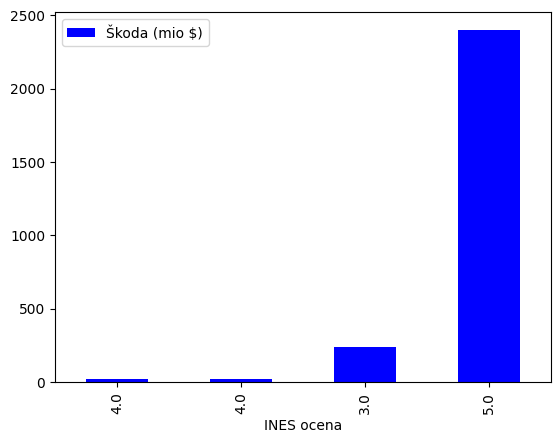

In [185]:
nesrece_v_zda.dropna().plot(kind='bar',
                    x='INES ocena',
                    y='Škoda (mio $)',
                    color='blue')

plt.show()

## **Primerjava podatkov o jedrskih reaktorjih in nesrečah**

Na koncu pa še primerjamo podatke o jedrskih reakotrjih in nesrečah, ki so jih povzročili. V ta namen najprej ustvarimo tabelo s številom nesreč in jedrskih reaktorjev za posamezno državo.

In [186]:
# ustvarimo tabelo s podatki o številu reaktorjev in nesreč na državo

presteto_nesrece = jedr_nesrece["Država"].value_counts().to_frame()
presteto_reaktorji = reaktorji["Država"].value_counts().to_frame()

st_nesrec = presteto_nesrece["count"]
presteto_reaktorji.rename(columns={'count':'Število reaktorjev'}, inplace=True)
presteto_reaktorji.insert(1, column="Število nesreč", value=st_nesrec)

display(presteto_reaktorji)

,Število reaktorjev,Število nesreč
Država,,
United States of America,157,54.0
China,116,NaN
Russia,87,7.0
France,75,12.0
Japan,62,20.0
United Kingdom,50,8.0
India,43,6.0
Germany,40,3.0
Ukraine,35,2.0


Za bolšjo predstavo prikažemo te podatke z grafom, ki prikazuje število jedrskih nesreč in reakotrjev za posamezno državo. Po pričakovanju se je v državah z večjim številom jedrskih reaktorjev zgodilo več jedrskih nesreč, tako je imela ZDA, država z največjim številom jedrskih, posledično največ nesreč. Vendar lahko še opazimo, da Kitajska, država z drugim največjim številom jedrskih reaktorjev in tudi z najmočnejšimi, nima imela jedrskih.

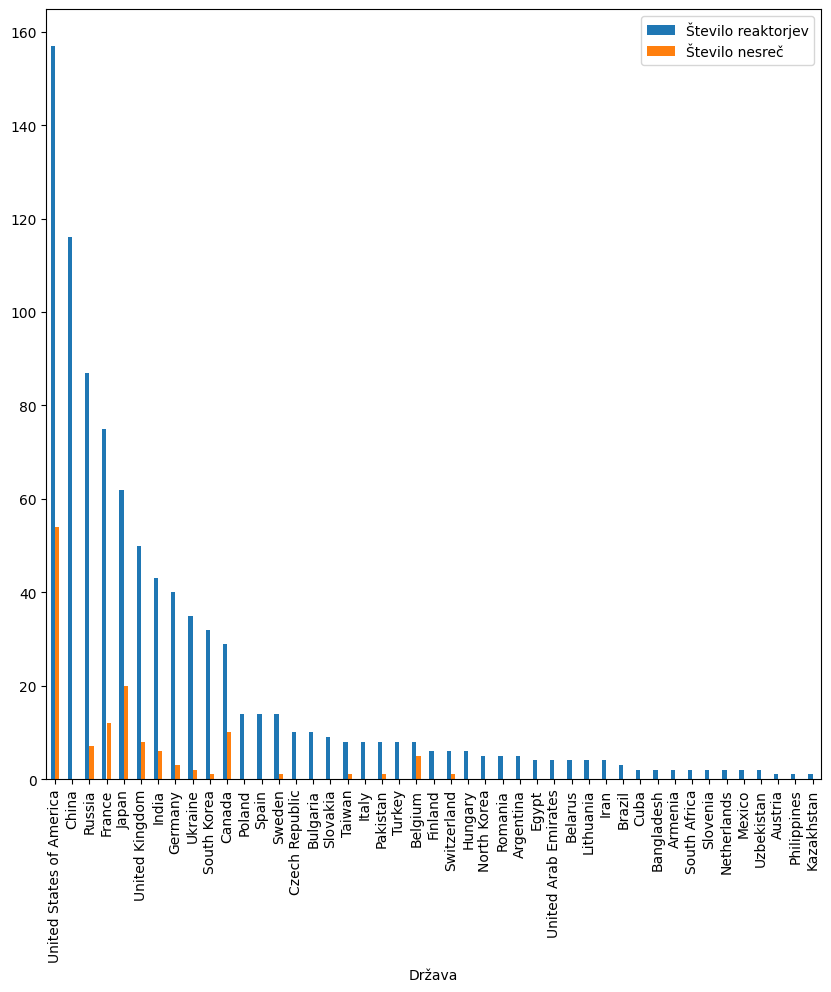

In [187]:
presteto_reaktorji.plot(y=["Število reaktorjev", "Število nesreč"],
                        kind="bar", figsize=(10, 10))

plt.show()

To lepše vidimo še s prikazom na zemljevidu, kjer se lepo vidi, da je države z največjim številom jedrskih nesreč in jedrskih reaktorjev.

<Axes: >

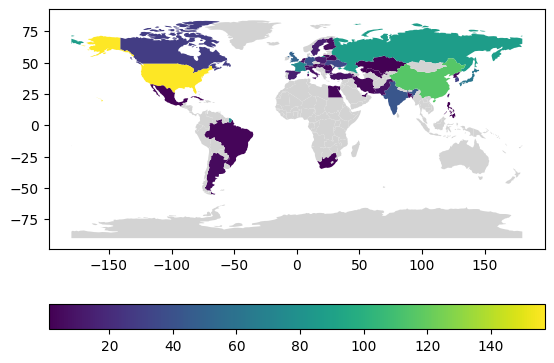

In [188]:
gdf = gpd.read_file("drzave.zip")
gdf.rename(columns={"ADMIN":"Country"}, inplace=True)
gdf.set_index("Country", inplace=True)
gdf["Število reaktorjev"] = presteto_reaktorji["Število reaktorjev"]

#zemljevid, ki prikazuje število reaktorjev v posamezni državi na svetu
gdf.plot(column="Število reaktorjev", legend=True, missing_kwds={"color":"lightgrey"}, legend_kwds={"orientation":"horizontal"})

<Axes: >

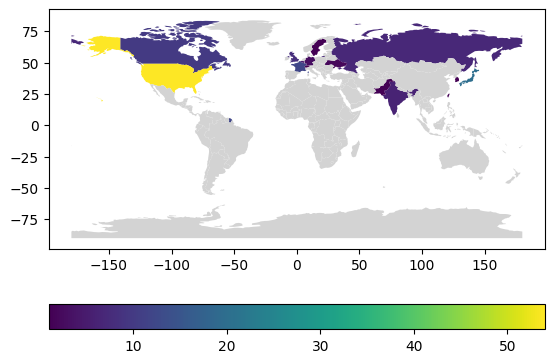

In [190]:
gdf = gpd.read_file("drzave.zip")
gdf.rename(columns={"ADMIN":"Country"}, inplace=True)
gdf.set_index("Country", inplace=True)
gdf["Število nesreč"] = presteto_reaktorji["Število nesreč"]

#zemljevid, ki prikazuje število nesreč v posamezni državi na svetu
gdf.plot(column="Število nesreč", legend=True, missing_kwds={"color":"lightgrey"}, legend_kwds={"orientation":"horizontal"})

## **Zaključek**